In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap

df = pd.read_csv('1.csv')

display(df)


,X,Y,Z,Column,Row,IsValid,IsFiltered
0,0.0,0.0,0.0,0,0,False,True
1,0.0,0.0,0.0,0,1,False,True
2,0.0,0.0,0.0,0,2,False,True
3,0.0,0.0,0.0,0,3,False,True
4,0.0,0.0,0.0,0,4,False,True
...,...,...,...,...,...,...,...
1048571,0.0,0.0,0.0,1023,1019,False,True
1048572,0.0,0.0,0.0,1023,1020,False,True
1048573,0.0,0.0,0.0,1023,1021,False,True
1048574,0.0,0.0,0.0,1023,1022,False,True


<ipython-input-5-4b7bc41b9cd6>:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  fig.add_axes(ax)


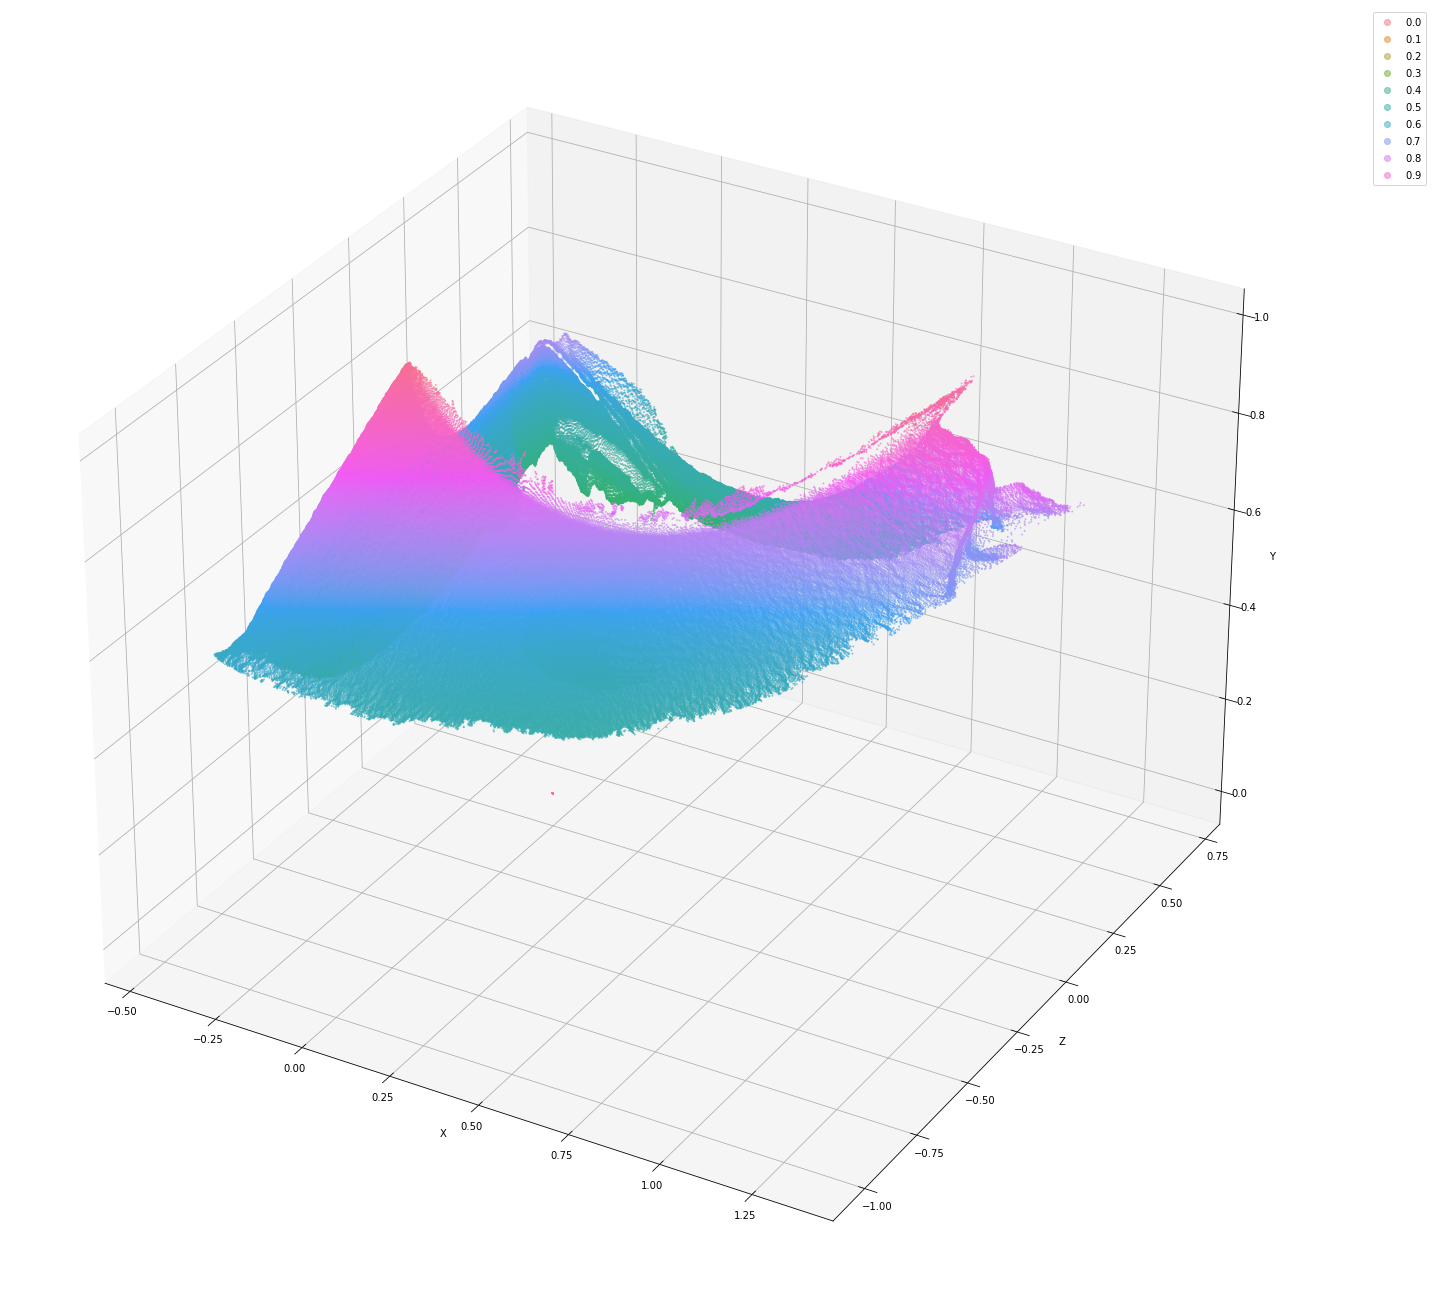

In [5]:
fig = plt.figure(figsize=(18,30))
ax = Axes3D(fig)
fig.add_axes(ax)

# get colormap from seaborn
cmap = ListedColormap(sns.color_palette("husl", 256).as_hex())

# plot
sc = ax.scatter(df['X'], df['Y'], df['Z'], s=1, c=df['Z'], marker='o', cmap=cmap, alpha=0.5)
ax.set_xlabel('X')
ax.set_ylabel('Z')
ax.set_zlabel('Y')

# legend
plt.legend(*sc.legend_elements(), bbox_to_anchor=(1.05, 1), loc=2)

,X,Y,Z,Column,Row,IsValid,IsFiltered
120930,0.000,0.000,0.000,118,98,True,False
121030,-0.406,-0.320,0.304,118,198,True,False
121040,-0.407,-0.311,0.311,118,208,True,False
121050,-0.407,-0.301,0.317,118,218,True,False
121060,-0.405,-0.289,0.321,118,228,True,False
...,...,...,...,...,...,...,...
919300,0.624,0.426,0.564,897,772,True,False
919310,0.614,0.435,0.547,897,782,True,False
919320,0.606,0.445,0.532,897,792,True,False
919330,0.601,0.458,0.520,897,802,True,False


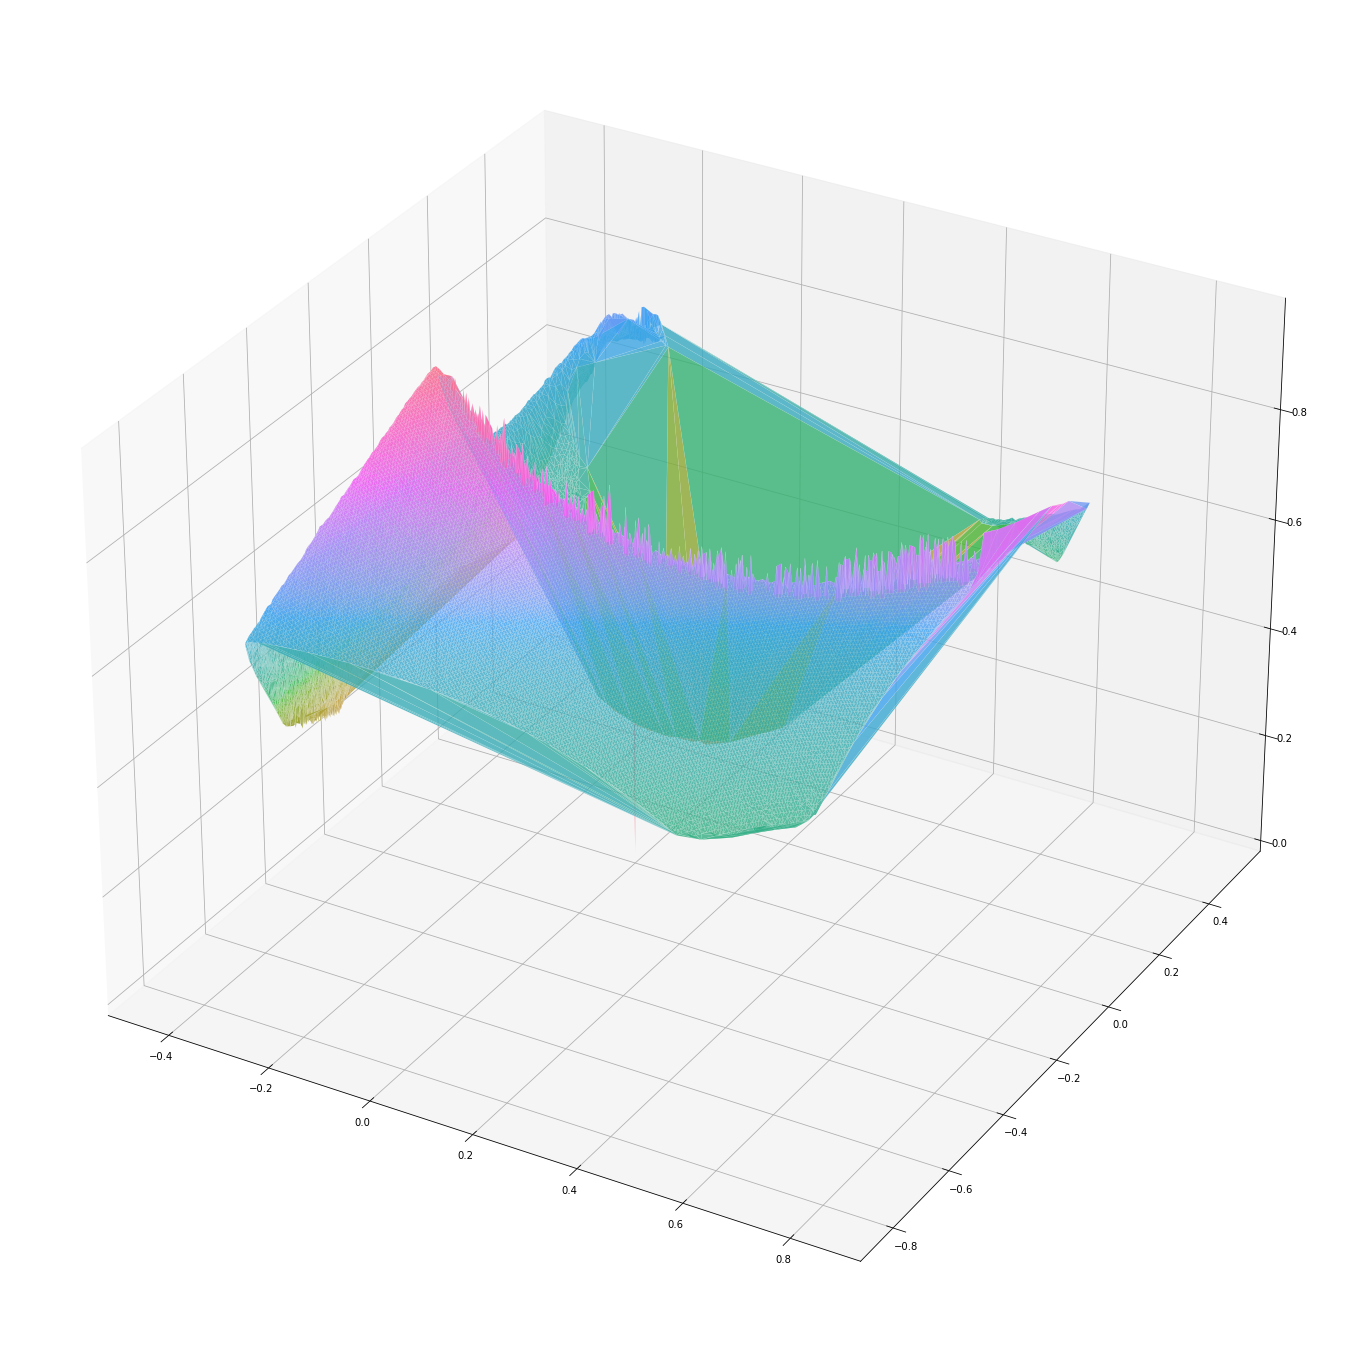

In [6]:
# source: https://stackoverflow.com/questions/12423601/simplest-way-to-plot-3d-surface-given-3d-points
# caution: triangulation takes a little time - use skip to skip points for faster result

import numpy as np
from scipy.spatial import Delaunay
import plotly.figure_factory as ff


skip = 10
idx_list = []

for idx in range(0, len(df) -1, skip):
    idx_list.append(idx)

dfiltered = df.iloc[idx_list]
dfiltered.query("IsFiltered == False", inplace=True)
dfiltered.drop_duplicates(subset=['X', 'Y', 'Z'], inplace=True)

display(dfiltered)

points = np.array(dfiltered[['X', 'Y', 'Z']].to_numpy())

# display(points)

tri = Delaunay(points, incremental=True, qhull_options="QJ")

# display(tri.simplices)


fig2 = plt.figure(figsize=(24,40))
ax2 = fig2.add_subplot(111, projection='3d')
ax2.plot_trisurf(tri.points[:,0], tri.points[:,1], tri.points[:,2], triangles=tri.simplices, linewidth=0.2, edgecolor='#ffffff55', antialiased=True, cmap=cmap, alpha=0.8)

plt.show()



